# Draw Landmarks and Extract KeyPoints

In [5]:
import cv2 
import os 
import mediapipe as mp 
import numpy as np 
import matplotlib.pyplot as plt 
import time 

In [6]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [7]:
def mediapipe_detection(image, model): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results 

In [8]:
# Draws landmark points on right and left hand 
def draw_styled_landmarks(image, results): 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [9]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [11]:
# Test to capture landmarks 
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    while cap.isOpened(): 

        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results) 
        
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break 

    cap.release()
    cv2.destroyAllWindows()

C:\Users\Richwei Chea\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
# Shows an array of each frame 
frame

array([[[50, 47, 49],
        [54, 51, 53],
        [52, 49, 51],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[58, 55, 57],
        [51, 48, 50],
        [49, 46, 48],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [49, 49, 49]],

       [[66, 63, 65],
        [52, 49, 51],
        [50, 47, 49],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[54, 51, 53],
        [55, 52, 54],
        [55, 52, 54],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[56, 53, 55],
        [55, 52, 54],
        [54, 51, 53],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       [[56, 53, 55],
        [55, 52, 54],
        [54, 51, 53],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]]], dtype=uint8)

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
draw_styled_landmarks(frame, results)

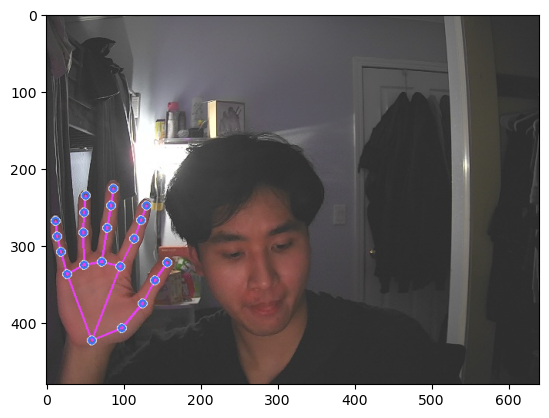

In [15]:
# Prints out test image in color of landmarks 
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [17]:
# results.left_hand_landmarks.landmark

In [18]:
#  Define lh and rh variables 
# Captures the values in array and if none, return 0 in correct shape
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
rh

array([ 9.28216800e-02,  8.81776690e-01,  5.11411542e-07,  1.54083446e-01,
        8.49910378e-01, -3.21953222e-02,  1.96601287e-01,  7.82515287e-01,
       -4.30988856e-02,  2.20553651e-01,  7.19228685e-01, -5.06738424e-02,
        2.45430321e-01,  6.71810806e-01, -5.77822886e-02,  1.51201099e-01,
        6.82368875e-01, -2.37913635e-02,  1.78260222e-01,  6.08033836e-01,
       -4.13437001e-02,  1.92703724e-01,  5.57997108e-01, -5.55492118e-02,
        2.03242034e-01,  5.16978025e-01, -6.57869354e-02,  1.13063425e-01,
        6.69932544e-01, -2.03967039e-02,  1.24406770e-01,  5.78753114e-01,
       -3.58825922e-02,  1.31831661e-01,  5.18711090e-01, -4.88491692e-02,
        1.36445016e-01,  4.71631229e-01, -5.81235290e-02,  7.70118237e-02,
        6.78916693e-01, -2.13541705e-02,  7.63568208e-02,  5.91356993e-01,
       -3.91395390e-02,  7.74455369e-02,  5.37069499e-01, -5.28541394e-02,
        8.00493062e-02,  4.91576970e-01, -6.17905259e-02,  4.23383787e-02,
        7.03727365e-01, -

In [21]:
# Extracts the keypoints on the hands and concatenates 
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 
    return np.concatenate([lh, rh])

In [22]:
extract_keypoints(results).shape

(126,)

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# Data Collection

In [25]:
DATA_PATH = os.path.join('Hand_Data')

actions = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", 
          "J", "K", "L", "M", "N", "O", "P","Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])
no_sequences = 30 
sequence_length = 30

In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except: 
            pass 

In [43]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    
    for action in actions:
        for sequence in range(no_sequences): 
            for frame_num in range(sequence_length): 
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                draw_styled_landmarks(image, results) 

                if frame_num == 0: 
                    cv2.putText(image, "Starting Collection", (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, "Collecting frames for {} Video Number {}".format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) 
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, "Collecting frames for {} Video Number {}".format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)  
                
                keypoints = extract_keypoints(results) 
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                cv2.imshow('OpenCV Feed', image)
        
                if cv2.waitKey(10) & 0xFF == ord('q'): 
                    break 

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [42]:
cap.release()
cv2.destroyAllWindows()

# Preprocessing Data

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)} 

In [29]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [30]:
sequences, labels  = [], []
for action in actions: 
    for sequence in range(no_sequences): 
        window = []
        for frame_num in range(sequence_length): 
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape

(780, 30, 126)

In [32]:
X = np.array(sequences) 

In [33]:
X.shape

(780, 30, 126)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [37]:
y_test.shape

(39, 26)

# Building Model

In [38]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join("Logs") 
tb_callback = TensorBoard(log_dir = log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = "relu", input_shape = (30,126)))
model.add(LSTM(128, return_sequences = True, activation = "relu")) 
model.add(LSTM(64, return_sequences = False, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu")) 
model.add(Dense(actions.shape[0], activation = "softmax"))

C:\Users\Richwei Chea\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
res = [0.5, 0.7, 0.1, 0.2, 0.9, 0.5, 0.7, 0.1, 0.2, 0.1, 0.5, 0.7, 0.1, 0.2, 0.9, 0.5, 0.7, 0.1, 0.2, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97]

# res = [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z]
# respective values

In [42]:
actions[np.argmax(res)]

'Z'

In [43]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [70]:
model.fit(X_train, y_train, epochs = 2000, callbacks = [tb_callback])

Epoch 1/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.0327 - loss: 3.2559
Epoch 2/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.0760 - loss: 3.1774
Epoch 3/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.1275 - loss: 2.9940
Epoch 4/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.1291 - loss: 2.9201
Epoch 5/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.1569 - loss: 2.7695
Epoch 6/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.1731 - loss: 2.5577
Epoch 7/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.2283 - loss: 2.3099
Epoch 8/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.2312 - loss: 2.2300
Epoch 9/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.2875 - loss: 1.9953
Epoch 10/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.3731 - loss: 1.7499
Epoch 11/

KeyboardInterrupt: 

In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │          48,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,656 (2.34 MB)

 Trainable params: 204,218 (797.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 408,438 (1.56 MB)

In [44]:
actions[np.argmax(res[1])]

'A'

In [45]:
actions[np.argmax(y_test[1])]

'E'

# Test Model

In [46]:
def calculate_bounding_box(hand_landmarks):
    x_coords = [landmark.x for landmark in hand_landmarks.landmark]
    y_coords = [landmark.y for landmark in hand_landmarks.landmark]
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)
    return min_x, min_y, max_x, max_y

In [ ]:
sequence = []
sentence = []
predictions = []
threshold = 0.5 

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    while cap.isOpened(): 

        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results) 

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30: 
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]: 
                            sentence.append(actions[np.argmax(res)]) 
                    else: 
                        sentence.append(actions[np.argmax(res)])
    
            if len(sentence) > 5: 
                sentence = sentence[-5:]

        if results.right_hand_landmarks:
            min_x, min_y, max_x, max_y = calculate_bounding_box(results.right_hand_landmarks)
            h, w, _ = image.shape
            cv2.rectangle(image, 
                          (int(min_x * w), int(min_y * h)), 
                          (int(max_x * w), int(max_y * h)), 
                          (0, 255, 0), 2)
            
            # Display the detected letter
            if len(sentence) > 0:
                cv2.putText(image, sentence[-1], 
                            (int(min_x * w), int(min_y * h) - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, 
                            (0, 255, 0), 2, cv2.LINE_AA)
    
            # image = prob_viz,(res, actions, image, colors) 

        
        # Forms a string of letters 
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16,), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break 

    cap.release()
    cv2.destroyAllWindows()

C:\Users\Richwei Chea\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Save Model

In [77]:
model.save("work_model.h5")

In [78]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [79]:
yhat = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [80]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [81]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  2]],

       [[35,  0],
        [ 0,  4]],

       [[37,  0],
        [ 0,  2]],

       [[36,  0],
        [ 0,  3]],

       [[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  2]],

       [[36,  0],
        [ 0,  3]],

       [[37,  0],
        [ 0,  2]],

       [[37,  0],
        [ 0,  2]],

       [[36,  0],
        [ 0,  3]],

       [[38,  0],
        [ 0,  1]],

       [[36,  0],
        [ 0,  3]],

       [[38,  0],
        [ 0,  1]],

       [[38,  0],
        [ 0,  1]],

       [[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  2]],

       [[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  2]],

       [[37,  0],
        [ 0,  2]]], dtype=int64)

In [82]:
accuracy_score(ytrue, yhat)

1.0

In [27]:
cap.release()
cv2.destroyAllWindows()

# Reloads trained model

In [1]:
from tensorflow.keras.models import load_model

# Replace with the path to your model file
model_path = r'C:\Users\Richwei Chea\OneDrive\Documents\SignDetection\work_model.h5'

# Load the model
model = load_model(model_path)